# <center> <b><span style="color:blue">Machine Learning Based Approach to Predict Attacks on Industrial Control Systems </b> </span></center>

## <b><span style="color:blue">Problem Definition</b> </span>
In this notebook we looking in to detecting or predicting attacks on industrial control systems ICS using Machine Learning techniques. 
This is an example of binary classification predictive modeling. From modeling prespective, classification necessitates a training dataset with a large number of examples of inputs and outputs from which to learn.
The training dataset will be used to calculate the optimum way to map samples of input data to specified class labels. As a result, the training dataset needs to be sufficiently representative of the problem and contain a large number of samples of each class label.
The class labels in our dataset is the attack or normal operation and its  already mapped to neumerical value {1,0} consecuctively.<br>
Since the bulk of cases in the training dataset are in the normal class, while a small percentage are in the abnormal(attack) class this will require sepecial techniques to deal with data imbalance. Those techniques are used to change the composition of the samples in two ways :
- Random Undersampling : Undersampling the majority class - select examples from the majority and delete them.
- Synthetic Minority Oversampling Technique (SMOTE) Oversampling : Oversampling the minority class - duplicating examples from the minority class before fitting the model.

Youl will need imbalanced learn python library to execute these sampling techniques.


## <b><span style="color:blue">Project Outline </b></span>

- Apply machine learning techniques to predict attacks on industrial systems using HAI-ICS time series dataset.
- Evaluate and analyze HAI dataset time series aspects ( stationary , seasonality ,etc ) and attributes to detect anomalies and thresholds.
- Visualize the process and the results using  different machine learning and statistical visualization techniques. 
- Apply machine learning model (VAR , Logisitic Regression.. etc) and dimensionality reduction technique such as prinicpal component analysis (PCA) to make our prediction.



## <b><span style="color:blue">Project Outline </b> </span>

- Apply machine learning techniques to predict attacks on industrial systems using HAI-ICS time series dataset.
- Evaluate and analyze HAI dataset time series aspects ( stationary , seasonality ,etc ) and attributes to detect anomalies and thresholds.
- Visualize the process and the results using  different machine learning and statistical visualization techniques. 


## <b><span style="color:blue">HAI Security Dataset</b> </span>

### <b><span style="color:blue">Background:</b></span>


As we all seen recently cyber security risks to national infrastructure and industrial facilities have been steadily increasing in recent months. So many countries all over the world are working to develop security solutions in response to cyber attacks that have the potential to wreak irreversible damage to countries and society by compromising critical national infrastructure. One of those ambitious projects concenring research on Industrical control systems security is developed in South Korea.The dataset generated from this research is called HIL-based Augmented ICS (HAI) Security Dataset or "HAI Security dataset".

The HAI data came from a realistic industrial control system (ICS) testbed that included a Hardware-In-the-Loop (HIL) simulator that simulated steam-turbine power generation and pumped-storage hydropower generating.

### <b><span style="color:blue">Dataset Details:</b></span>

The HAI dataset that was collected on the HAI testbed and its currently available on the project github page which can be found <b>[here](https://github.com/icsdataset/hai)</b>. The testbed is made up of four processes:

1. <b>a GE turbine</b>: Turbine Process (P2): 
2. <b>Emerson boiler</b>: Boiler Process (P1): 
3. <b>FESTO water treatment systems</b>: Water-treatment (P3) 
4. <b>All combined using a hardware-in-the-loop (HIL) simulator</b>: HIL (P4) HIL systems is composed of controller under a test a real time simulator together with IO Modules.

The dataset contains several measurement channels (e.g., sensors, actuators, and control devices) that depict the current state of the systems.It's also available in two variants. Each version is made up of many csv files that, according to the site, ensure time continuity.Two sets of dataset from two different target configurations are included in the HAI dataset with several csv files.

The security Scenario configuration have been continuosuly developed and created based on the following:
* <b>Normal Operation</b>: Complex process of the long-term human intervention for normal operations applied.<br>
<i>Situation</i>: <br>
Through the experiments , normal ranges are confirmed and monitored  even using a scheduled task to generate random values within the normal range.The normal ranges of SP values in which the entire process was stable were determined by experimentally changing the value of each SP.An HMI operation task scheduler was used to periodically set the SPs and HIL simulator.  variables to predefined values within the normal range.
* <b>Abnormal Behaviors</b>:  Realization of the various ICS attacks on real world systems using scalable attack tool followed by labeling of anomalies.
Three ICS are interconnected via HIL simulator that Simulated those complex systems.<br>
<i>Situation</i>:<br>
Abnormal behavior occurred when some of the parameters were not within the limits of the normal range or were in unexpected states due to attacks, malfunctions, and failures.Attack scenarios have been implemented by considering attack target  for each feed back control loop. 

<i>Attack types</i>: <br>
-  a. Response Prevention: hiding abnormal response on PV on HMI 
-  b. Setpoints (SP) attacks: forcing the SP value to indirectly change the CO value 
-  c. CO attack: forcing the CO value directly 
### <b><span style="color:blue">Attribute Information</b>:</span>
The dataset attributes comprised from the followings:
1. <b>time</b> : This is the first column and it represents the observed local time as “yyyy-MM-dd hh:mm:ss,” while the rest columns provide the recorded SCADA data points - column 01 
2. <b>P1_B2004...P4_HT_LD </b>:  contains data collected from different setpoints and sensors in the process. These values are neumeric values.
3. <b>attack</b>: provides an info for whether an attack occured or not{1,0}. Where this is applicable to any attack happening on all the processes.last column.

---
### <span style="color:blue">Identifying Important Attributes </span>

So before we work on the dataset attributes and apply our models we need to prepare the dataset. Since our attacks scenarios involved attacking specific controllers that changes different set points we noticed the followings:
1. The attacks conducted according to the technical details provided for that period of time are targeting specific controllers. Those controllers influence the target points vlaue we seen in the dataset. 



Since our attack dataset is between july 9 to july 10  then we will consider the following  features or columns based on the target controller points and the set points data. 
this includes the following :
<br>
* Set points:
1. P1_B2004 2. P1_B3004 3. P1_B3005 4. P1_B4002 5. P4_ST_PS 6. P4_HT_PS 
* Target points:
1. P2_VTR02 2. P1_B2016 3. P1_PIT01 4. P1_LCV01D 5. P1_FT03 6. P1_FCV03D 7. P2_VTR01 8. P1_LIT01 9. P2_ASD 10. P3_LCP01D 11. P2_RTR 12. P2_SIT01  13. P1_PCV01D 14. P2_CO_rpm

Using those attribute and setpoints will be the focus of our dataset.Since the attack scenarios are configured based on the four variables of the feedback control loop , namely the set points (SP) , process variables (PV) , control variables CV and control parameters CP according to the technical details.


## <b><span style="color:blue">Model Proposal & Procedures </b></span>

The diagram below illustrates our road map :

<img src="images/ml-model.png" align="center" alt="Model Arch. Diagram"  width="800"/>

Workflow steps :

1. Loading the dataset and work on analyzing the data and the features.
2. Analayze the attributes and understand the process and the variables impact.
3. Apply features  scaling .
4. Check for Imbalance in the dataset and balance if needed  and apply features selection.
5. Time series data test - stationary trend etc 
6. Evaluate Machine Learning Model



## <b><span style="color:blue">Packages needed </b></span>
Uncomment the following line and paste it in to a codebox:

all done via pip
* #!pip install yellowbrick
* #!pip install seaborn
* #!pip install scipy
* #!pip install statsmodels
* #!pip install imbalanced-learn

## <b><span style="color:blue">Step 1: Import Libraries <b></span> 
Import some of the required libraries.


In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
# Seaborn Styling 
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)



In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from collections import Counter
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

## <span style="color:blue"><b>Step 2: Loading the HAI Dataset </b></span>
Create New Variable and stores the dataset values as Data Frame.

In [3]:
PATH = 'dataset/test2.csv'
hai_data = pd.read_csv(PATH, parse_dates=['time'], index_col=['time'])
hai_data_raw = pd.read_csv(PATH, header=0)

Lets display the some few information from our large datasets.Here, We shows the first five rows and the last rows from datasets

In [4]:
hai_data.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2020-07-09 15:00:00,0.09874,1.25036,382.21698,1118.61084,32.0,99.98731,2835.65454,35.37903,92.69160,92.51556,...,0,284.39673,-0.00231,15844.0,283.92651,293.51129,0,10051.0,27600.0,0
2020-07-09 15:00:01,0.09874,1.24944,382.21698,1118.61084,32.0,100.00000,2832.98731,35.37674,92.64934,92.51556,...,0,283.47436,-0.00181,15808.0,283.36591,292.67938,0,10052.0,27600.0,0
2020-07-09 15:00:02,0.09874,1.24746,382.21698,1118.61084,32.0,99.98115,2842.25244,35.37178,92.91075,92.51556,...,0,282.69678,0.00007,15734.0,282.93189,291.90179,0,10052.0,27595.0,0
2020-07-09 15:00:03,0.09874,1.24624,382.21698,1118.61084,32.0,100.00000,2833.12744,35.36873,92.92407,92.51556,...,0,283.04034,0.00000,15710.0,282.06378,291.59430,0,10053.0,27590.0,0
2020-07-09 15:00:04,0.09874,1.24364,382.21698,1118.61084,32.0,100.00000,2839.44482,35.36224,93.05405,92.51556,...,0,281.99145,-0.00029,15608.0,283.67334,289.87628,0,10052.0,27588.0,0


In [5]:
hai_data.tail()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2020-07-10 23:59:56,0.10121,1.30608,397.63785,1001.99799,33.6555,100.0,2830.74121,37.16766,100.0,100.0,...,0,302.20990,0.00036,16589.0,300.88971,307.52679,0,10052.0,27614.0,0
2020-07-10 23:59:57,0.10121,1.30226,397.63785,1001.99799,33.6555,100.0,2839.72559,37.15812,100.0,100.0,...,0,300.47382,0.00101,16496.0,299.84088,306.17041,0,10052.0,27616.0,0
2020-07-10 23:59:58,0.10121,1.29707,397.63785,1001.99799,33.6555,100.0,2833.96997,37.14515,100.0,100.0,...,0,299.98554,-0.00072,16476.0,300.09406,305.48321,0,10052.0,27610.0,0
2020-07-10 23:59:59,0.10121,1.29906,397.63785,1001.99799,33.6555,100.0,2842.95435,37.15011,100.0,100.0,...,0,300.87164,-0.00275,16408.0,299.58765,304.90454,0,10052.0,27617.0,0
2020-07-11 00:00:00,0.10121,1.29784,397.63785,1001.99799,33.6555,100.0,2847.02539,37.14706,100.0,100.0,...,0,301.01636,-0.00297,16495.0,301.35992,305.03113,0,10052.0,27610.0,0


In [6]:
print("HAI Dataset Shape:", hai_data.shape)

HAI Dataset Shape: (118801, 80)


In [7]:
print("HAI Dataset Column Names:",hai_data.columns)

HAI Dataset Column Names: Index(['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005',
       'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D',
       'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02',
       'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01',
       'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01',
       'P1_PIT02', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR',
       'P1_PP02D', 'P1_PP02R', 'P1_STSP', 'P1_TIT01', 'P1_TIT02', 'P2_24Vdc',
       'P2_ASD', 'P2_AutoGO', 'P2_CO_rpm', 'P2_Emerg', 'P2_HILout', 'P2_MSD',
       'P2_ManualGO', 'P2_OnOff', 'P2_RTR', 'P2_SIT01', 'P2_SIT02',
       'P2_TripEx', 'P2_VT01', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04',
       'P2_VXT02', 'P2_VXT03', 'P2_VYT02', 'P2_VYT03', 'P3_FIT01', 'P3_LCP01D',
       'P3_LCV01D', 'P3_LH', 'P3_LIT01', 'P3_LL', 'P3_PIT01', 'P4_HT_FD',
       'P4_HT_LD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD', 'P

### <span style="color:blue"><b>Step 2.1: Loading Important Attributes Data </b></span>: 

In [8]:
hai_data = hai_data[[ 'P1_B2004', 'P1_B3004', 'P1_B3005','P1_B4002','P4_ST_PS','P4_HT_PS','P2_VTR02','P1_B2016','P1_PIT01','P1_LCV01D','P1_FT03','P1_FCV03D','P2_VTR01','P1_LIT01','P2_ASD','P3_LCP01D','P2_RTR','P2_SIT01','P1_PCV01D','P2_CO_rpm','P3_LCP01D','P3_LCV01D','attack']]
hai_data1 = hai_data.to_csv('dataset/hai-attack1.csv')
hai_data2 = hai_data.to_csv('dataset/hai-attack2.csv', index=False)
hai_data1 = pd.read_csv('dataset/hai-attack1.csv',parse_dates=['time'], index_col=['time'])
hai_data2 = pd.read_csv('dataset/hai-attack2.csv')

In [9]:
hai_data1.head()

,P1_B2004,P1_B3004,P1_B3005,P1_B4002,P4_ST_PS,P4_HT_PS,P2_VTR02,P1_B2016,P1_PIT01,P1_LCV01D,...,P1_LIT01,P2_ASD,P3_LCP01D,P2_RTR,P2_SIT01,P1_PCV01D,P2_CO_rpm,P3_LCP01D.1,P3_LCV01D,attack
time,,,,,,,,,,,,,,,,,,,,,
2020-07-09 15:00:00,0.09874,382.21698,1118.61084,32.0,0,0,10,1.25036,1.35437,13.97231,...,384.30737,0,136,2880,774.0,83.46329,54065.0,136,-224,0
2020-07-09 15:00:01,0.09874,382.21698,1118.61084,32.0,0,0,10,1.24944,1.35437,13.93358,...,384.30737,0,136,2880,773.0,83.40041,54073.0,136,-224,0
2020-07-09 15:00:02,0.09874,382.21698,1118.61084,32.0,0,0,10,1.24746,1.35513,13.95248,...,384.20517,0,136,2880,773.0,83.34054,54073.0,136,-224,0
2020-07-09 15:00:03,0.09874,382.21698,1118.61084,32.0,0,0,10,1.24624,1.35513,13.89971,...,384.25626,0,136,2880,777.0,83.26884,54086.0,136,-224,0
2020-07-09 15:00:04,0.09874,382.21698,1118.61084,32.0,0,0,10,1.24364,1.35437,13.94603,...,384.20517,0,136,2880,778.0,83.18826,54086.0,136,-224,0


## <span style="color:blue"><b>Step 3: Data Cleaning </b></span>
So before we visualize the dataset attributes and apply our models we need to clean the dataset. 

In [10]:
hai_data1.nunique()

P1_B2004           99
P1_B3004          119
P1_B3005          120
P1_B4002           96
P4_ST_PS            2
P4_HT_PS            2
P2_VTR02            1
P1_B2016        18797
P1_PIT01         2094
P1_LCV01D      105385
P1_FT03          1890
P1_FCV03D      106100
P2_VTR01            1
P1_LIT01         3669
P2_ASD              1
P3_LCP01D        1846
P2_RTR              1
P2_SIT01          816
P1_PCV01D      110330
P2_CO_rpm        1060
P3_LCP01D.1      1846
P3_LCV01D        1203
attack              2
dtype: int64

In [11]:
del hai_data1['P2_VTR02']
del hai_data1['P2_VTR01']
del hai_data1['P2_ASD']
del hai_data1['P2_RTR']

del hai_data2['P2_VTR02']
del hai_data2['P2_VTR01']
del hai_data2['P2_ASD']
del hai_data2['P2_RTR']


## <span style="color:blue"><b>Step 4: Understanding the Data </b></span>
We will start by using Descriptive Statistics in Data Exploration. This is used to so we can  take a closer look at our loaded data.In this step we going to take a look at the data dimensions , stats summary of the attributes , and the class variables.
### <span style="color:blue">Step 4.1: Dataset Dimensions Datatypes,and Columns</span>
In this step we get an understanding of the number of instances (rows and the attributes (columns the data contains using the shape property.

In [12]:
print(hai_data1.shape)
print(hai_data1.columns)
print(hai_data1.info())

(118801, 19)
Index(['P1_B2004', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P4_ST_PS', 'P4_HT_PS',
       'P1_B2016', 'P1_PIT01', 'P1_LCV01D', 'P1_FT03', 'P1_FCV03D', 'P1_LIT01',
       'P3_LCP01D', 'P2_SIT01', 'P1_PCV01D', 'P2_CO_rpm', 'P3_LCP01D.1',
       'P3_LCV01D', 'attack'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118801 entries, 2020-07-09 15:00:00 to 2020-07-11 00:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   P1_B2004     118801 non-null  float64
 1   P1_B3004     118801 non-null  float64
 2   P1_B3005     118801 non-null  float64
 3   P1_B4002     118801 non-null  float64
 4   P4_ST_PS     118801 non-null  int64  
 5   P4_HT_PS     118801 non-null  int64  
 6   P1_B2016     118801 non-null  float64
 7   P1_PIT01     118801 non-null  float64
 8   P1_LCV01D    118801 non-null  float64
 9   P1_FT03      118801 non-null  float64
 10  P1_FCV03D    118801 non-null  float6

### <span style="color:blue">Step 4.2: Summary statistics</span>
This includes the count , mean , the min and max values as well as some percentiles. Since we have so many features and attributes its really difficult to make sense of the data to some degree.
Let’s summarize the distribution of each attribute.

In [13]:
hai_data1.describe().style.background_gradient(cmap = 'copper')

,P1_B2004,P1_B3004,P1_B3005,P1_B4002,P4_ST_PS,P4_HT_PS,P1_B2016,P1_PIT01,P1_LCV01D,P1_FT03,P1_FCV03D,P1_LIT01,P3_LCP01D,P2_SIT01,P1_PCV01D,P2_CO_rpm,P3_LCP01D.1,P3_LCV01D,attack
count,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000,118801.000000
mean,0.100169,398.345730,1066.996483,32.598745,1.341319,0.268264,1.395836,1.386082,12.345037,285.119269,58.676109,398.866841,4636.928410,781.593362,67.740877,54100.049301,4636.928410,7189.157128,0.029032
std,0.001146,10.159895,43.182916,0.676369,8.078821,1.615764,0.128718,0.073331,4.812710,25.315659,5.307163,13.557286,5128.592987,33.335821,19.890980,110.417793,5128.592987,6822.702448,0.167896
min,0.098040,382.216980,994.635680,31.609390,0.000000,0.000000,1.033940,0.097810,0.000000,120.177260,32.636210,162.613240,-8.000000,0.000000,0.000000,51648.000000,-8.000000,-288.000000,0.000000
25%,0.098740,396.063020,1001.997990,32.000000,0.000000,0.000000,1.322710,1.364290,9.627970,248.156240,52.010710,394.786380,72.000000,780.000000,49.756900,54092.000000,72.000000,-176.000000,0.000000
50%,0.100480,396.063020,1085.589360,32.615000,0.000000,0.000000,1.391550,1.383360,13.118050,296.219910,60.678870,397.648930,1976.000000,784.000000,67.296840,54106.000000,1976.000000,6304.000000,0.000000
75%,0.101210,405.692200,1094.344850,33.185500,0.000000,0.000000,1.467390,1.397090,13.947710,301.369570,61.728140,405.776490,9680.000000,786.000000,84.541950,54119.000000,9680.000000,14288.000000,0.000000
max,0.101360,423.351990,1118.610840,33.655500,50.000000,10.000000,1.997020,2.419430,97.000000,351.212920,91.435270,552.073240,20592.000000,895.000000,100.000000,54758.000000,20592.000000,23392.000000,1.000000


Make some of Analysis to explain the data

In [14]:
hai_data1.corr().style.background_gradient(cmap = 'copper')

,P1_B2004,P1_B3004,P1_B3005,P1_B4002,P4_ST_PS,P4_HT_PS,P1_B2016,P1_PIT01,P1_LCV01D,P1_FT03,P1_FCV03D,P1_LIT01,P3_LCP01D,P2_SIT01,P1_PCV01D,P2_CO_rpm,P3_LCP01D.1,P3_LCV01D,attack
P1_B2004,1.000000,0.407565,-0.074402,0.226280,-0.270834,-0.270834,-0.027094,-0.033619,-0.113144,-0.081481,-0.239205,0.332956,-0.022610,-0.030168,-0.134425,0.018098,-0.022610,0.026750,-0.029708
P1_B3004,0.407565,1.000000,-0.095569,-0.048440,0.142295,0.142295,0.033029,0.056068,-0.016127,-0.091579,-0.346247,0.738642,-0.014326,-0.007719,-0.100483,0.000463,-0.014326,-0.012522,0.022089
P1_B3005,-0.074402,-0.095569,1.000000,-0.834299,0.062991,0.062991,-0.071360,-0.256330,0.422931,0.991216,0.899078,-0.045306,0.009993,0.012616,0.698281,-0.035975,0.009993,-0.037172,0.021657
P1_B4002,0.226280,-0.048440,-0.834299,1.000000,-0.113623,-0.113623,0.066891,0.187864,-0.379805,-0.828764,-0.706811,-0.049743,-0.010027,-0.029475,-0.521454,0.022295,-0.010027,0.032424,-0.000552
P4_ST_PS,-0.270834,0.142295,0.062991,-0.113623,1.000000,1.000000,-0.026915,-0.022528,0.028133,0.061683,-0.007635,0.109743,-0.002087,0.012719,-0.074391,-0.028754,-0.002087,-0.007728,0.018455
P4_HT_PS,-0.270834,0.142295,0.062991,-0.113623,1.000000,1.000000,-0.026915,-0.022528,0.028133,0.061683,-0.007635,0.109743,-0.002087,0.012719,-0.074391,-0.028754,-0.002087,-0.007728,0.018455
P1_B2016,-0.027094,0.033029,-0.071360,0.066891,-0.026915,-0.026915,1.000000,0.079325,-0.015802,-0.063947,-0.059313,0.032857,-0.539624,-0.038793,0.145288,-0.046928,-0.539624,0.558464,0.001402
P1_PIT01,-0.033619,0.056068,-0.256330,0.187864,-0.022528,-0.022528,0.079325,1.000000,-0.349223,-0.262744,-0.252560,0.004231,0.020871,0.009991,-0.040903,0.016660,0.020871,0.019761,0.005424
P1_LCV01D,-0.113144,-0.016127,0.422931,-0.379805,0.028133,0.028133,-0.015802,-0.349223,1.000000,0.430539,0.486693,-0.351887,-0.023823,0.009552,0.221139,-0.015416,-0.023823,0.007318,0.283747
P1_FT03,-0.081481,-0.091579,0.991216,-0.828764,0.061683,0.061683,-0.063947,-0.262744,0.430539,1.000000,0.898038,-0.026296,0.003442,0.010766,0.701788,-0.037966,0.003442,-0.031268,0.024129


### <span style="color:blue">Step 4.3: Class Distribution </span>
We look at the number of instances of the class.

In [15]:
# class distribution
print(hai_data1.groupby('attack').size())

attack
0    115352
1      3449
dtype: int64


We can see that attack class with value of  1s occupies 3449 instances from the 115352 instances which is an indication of imbalanced dataset. so we'll need to resample the data.

## <span style="color:blue"><b>Step 5: Statistical Analysis Visualization</b></span>

### <span style="color:blue">Step 5.1: Uni-variate Analysis</span>
The goal is to select those features that have the strongest relationship with the output variable in addition to understand the distribution of the attributes.It allows you to describe patterns and get an idea of the distribution found in univariate data include.
#### <span style="color:blue">1. Histogram Plots</span>

Histogram plots can provide provide insight into the underlying distribution of the observation whether it looks like strognly gaussian shape or not.

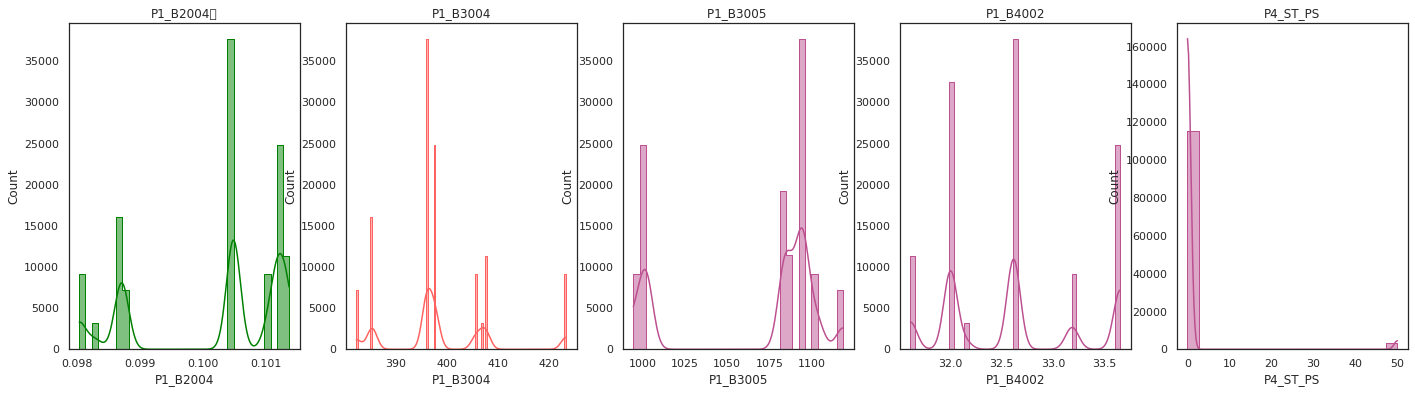

In [16]:
sns.set(style="white")
fig, axs = plt.subplots(1, 5, figsize=(24, 6))
sns.histplot(hai_data1.P1_B2004	,  element="step",color="green", kde=True, ax=axs[ 0] ).set_title("P1_B2004	")
sns.histplot(hai_data1.P1_B3004 ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_B3004")
sns.histplot(hai_data1.P1_B3005 ,  element="step",color="#bc5090", kde=True,ax=axs[2 ] ).set_title("P1_B3005 ")
sns.histplot(hai_data1.P1_B4002,  element="step",color="#bc5090", kde=True,ax=axs[3] ).set_title("P1_B4002")
sns.histplot(hai_data1.P4_ST_PS,  element="step",color="#bc5090", kde=True,ax=axs[4 ] ).set_title("P4_ST_PS")
plt.show()

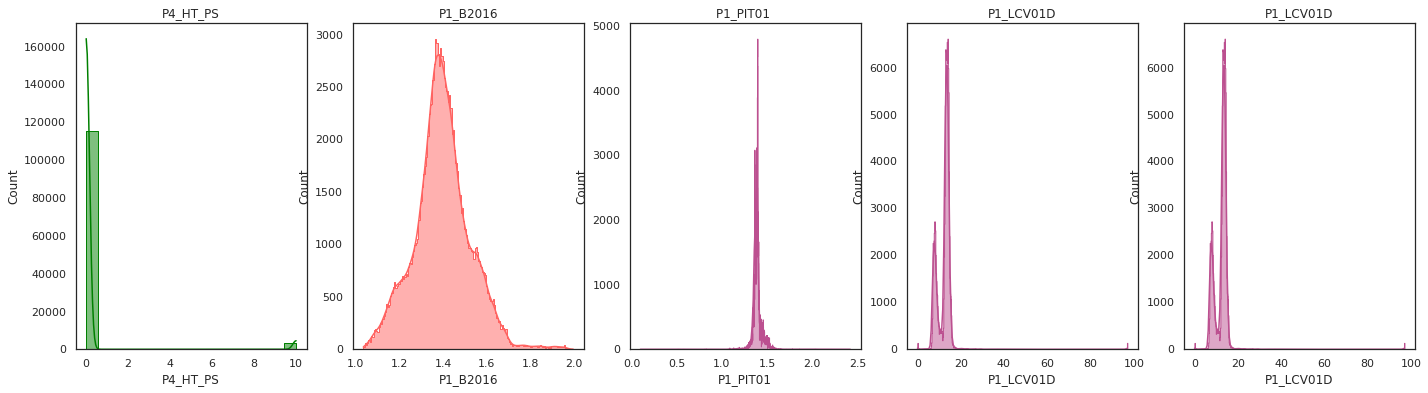

In [17]:
sns.set(style="white")
fig, axs = plt.subplots(1, 5, figsize=(24, 6))
sns.histplot(hai_data1.P4_HT_PS  ,  element="step",color="green", kde=True, ax=axs[0]).set_title("P4_HT_PS")
sns.histplot(hai_data1.P1_B2016 ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_B2016")
sns.histplot(hai_data1.P1_PIT01 ,  element="step",color="#bc5090", kde=True,ax=axs[2]).set_title("P1_PIT01 ")
sns.histplot(hai_data1.P1_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[3]).set_title("P1_LCV01D")
sns.histplot(hai_data1.P1_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[4]).set_title("P1_LCV01D")
plt.show()

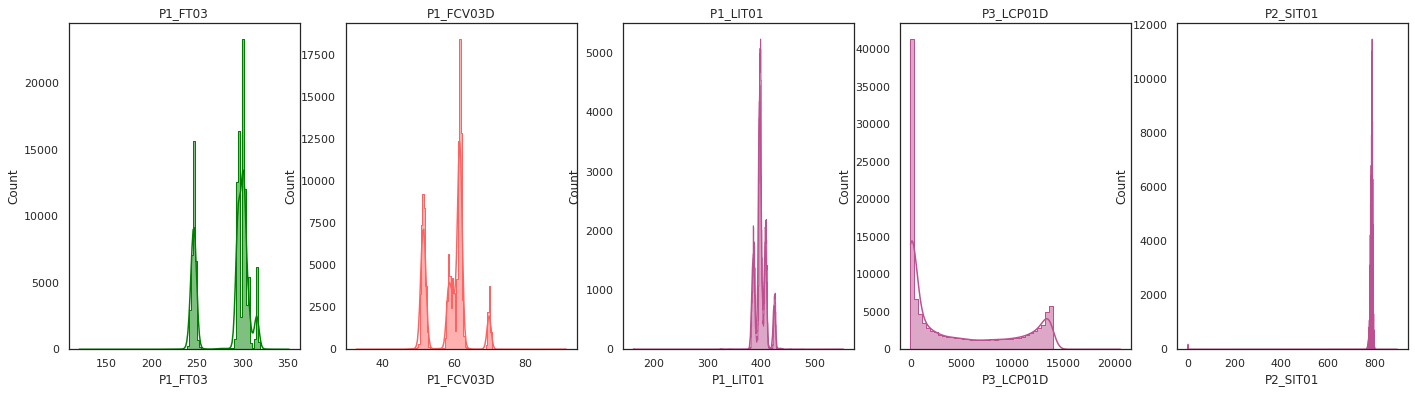

In [18]:
sns.set(style="white")
fig, axs = plt.subplots(1, 5, figsize=(24, 6))
sns.histplot(hai_data1.P1_FT03  ,  element="step",color="green", kde=True, ax=axs[0]).set_title("P1_FT03")
sns.histplot(hai_data1.P1_FCV03D ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P1_FCV03D")
sns.histplot(hai_data1.P1_LIT01 ,  element="step",color="#bc5090", kde=True,ax=axs[2]).set_title("P1_LIT01 ")
sns.histplot(hai_data1.P3_LCP01D,  element="step",color="#bc5090", kde=True,ax=axs[3]).set_title("P3_LCP01D")
sns.histplot(hai_data1.P2_SIT01,  element="step",color="#bc5090", kde=True,ax=axs[4]).set_title("P2_SIT01")
plt.show()

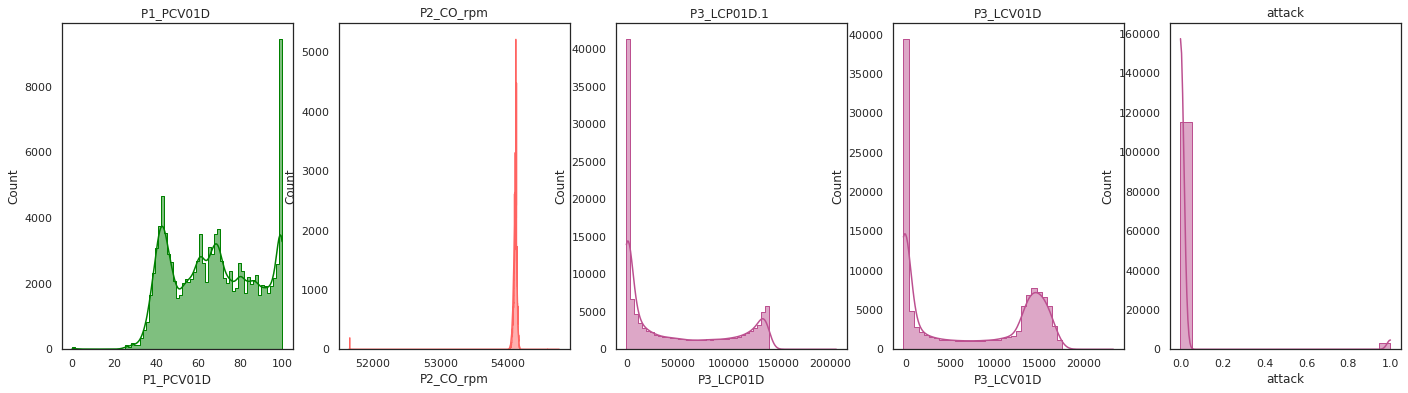

In [19]:
sns.set(style="white")
fig, axs = plt.subplots(1, 5, figsize=(24, 6))
sns.histplot(hai_data1.P1_PCV01D   ,  element="step",color="green", kde=True, ax=axs[0]).set_title("P1_PCV01D ")
sns.histplot(hai_data1.P2_CO_rpm ,  element="step", color="#ff6361",kde=True, ax=axs[ 1]).set_title("P2_CO_rpm")
sns.histplot(hai_data1.P3_LCP01D/.1 ,  element="step",color="#bc5090", kde=True,ax=axs[2]).set_title("P3_LCP01D.1 ")
sns.histplot(hai_data1.P3_LCV01D,  element="step",color="#bc5090", kde=True,ax=axs[3]).set_title("P3_LCV01D")
sns.histplot(hai_data1.attack,  element="step",color="#bc5090", kde=True,ax=axs[4]).set_title("attack")
plt.show()

#### <span style="color:blue">2. Density Plots</span>
Density plots can provide us also with better understanding of the data distribution shape. Its like a histogram but its smooth line that used to summarize the distribution.

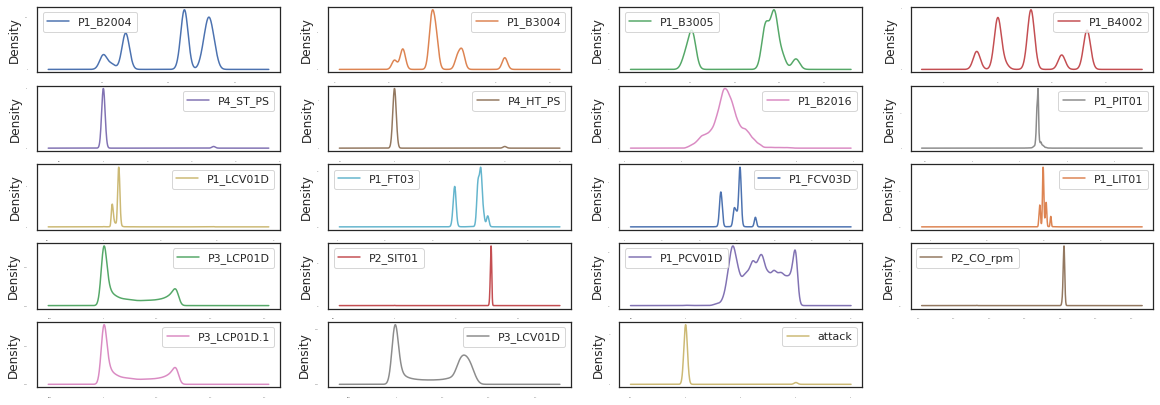

In [20]:
hai_data1.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True,fontsize=1)
plt.show()

###  <span style="color:blue">Step 5.2: Multi-variate Analysis</span>
#### <span style="color:blue">1. Correaltion </span>
We look at heatmap based on our partition models to look closely in to the correlation between group with the similar types. We will start with the correlation matrix.

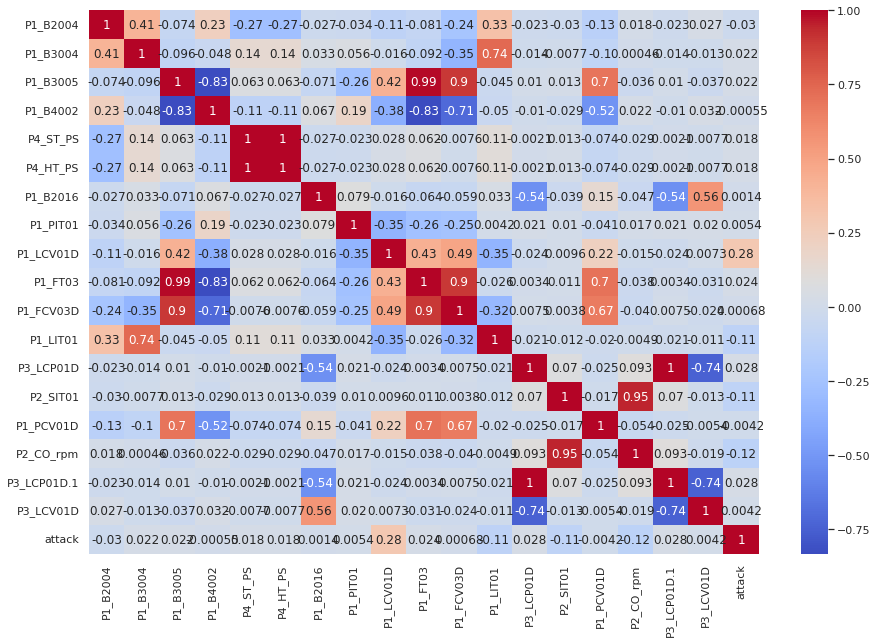

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(hai_data1.corr(),annot=True,cmap='coolwarm')
plt.show()

Strong correlation as you go to lower right corner , the top left corner , left side , and the center of the correlation plot.
#### <span style="color:blue">2. Histogram Plots </span>

We also look at each variable/column  corresponding to the attack column

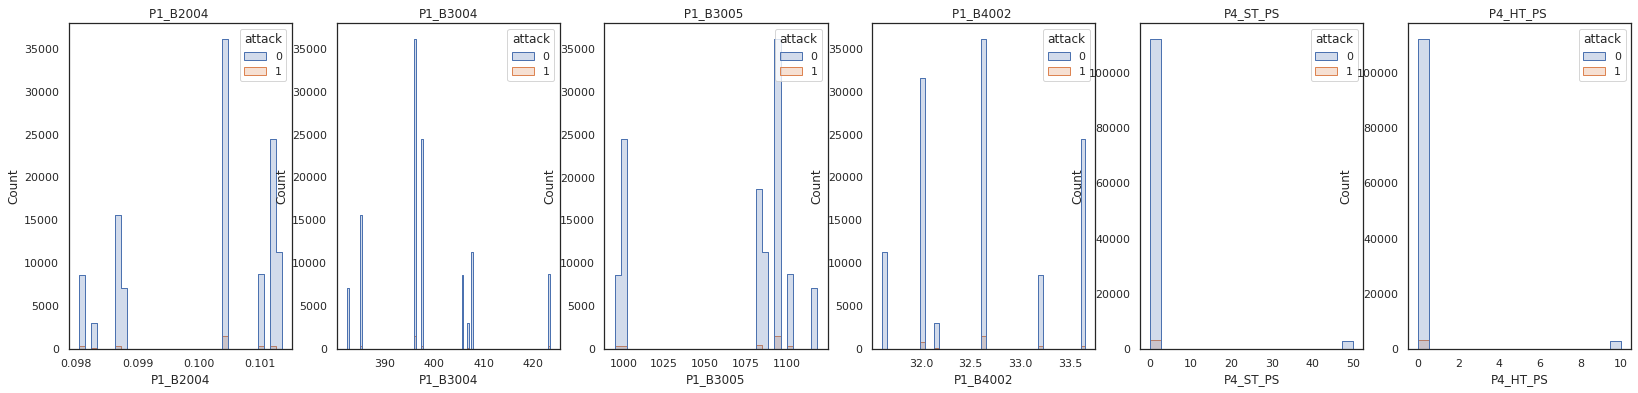

In [22]:
sns.set(style="white")
fig, axs = plt.subplots(1, 6, figsize=(28, 6))
sns.histplot(data=hai_data1, x="P1_B2004", hue="attack", element="step",color="green",fill=True,  ax=axs[ 0] ).set_title("P1_B2004 ")
sns.histplot(data=hai_data1,x="P1_B3004",hue="attack",  element="step", color="#ff6361",fill=True,ax=axs[ 1]).set_title("P1_B3004")
sns.histplot(data=hai_data1,x="P1_B3005", hue="attack",  element="step",color="#bc5090",ax=axs[2 ] ).set_title(" P1_B3005  ")

sns.histplot(data=hai_data1, x="P1_B4002", hue="attack", element="step",color="green",fill=True,  ax=axs[ 3] ).set_title("P1_B4002 ")
sns.histplot(data=hai_data1,x="P4_ST_PS",hue="attack",  element="step", color="#ff6361",fill=True,ax=axs[ 4]).set_title("P4_ST_PS")
sns.histplot(data=hai_data1,x="P4_HT_PS", hue="attack",  element="step",color="#bc5090",ax=axs[5 ] ).set_title(" P4_HT_PS  ")
plt.show()

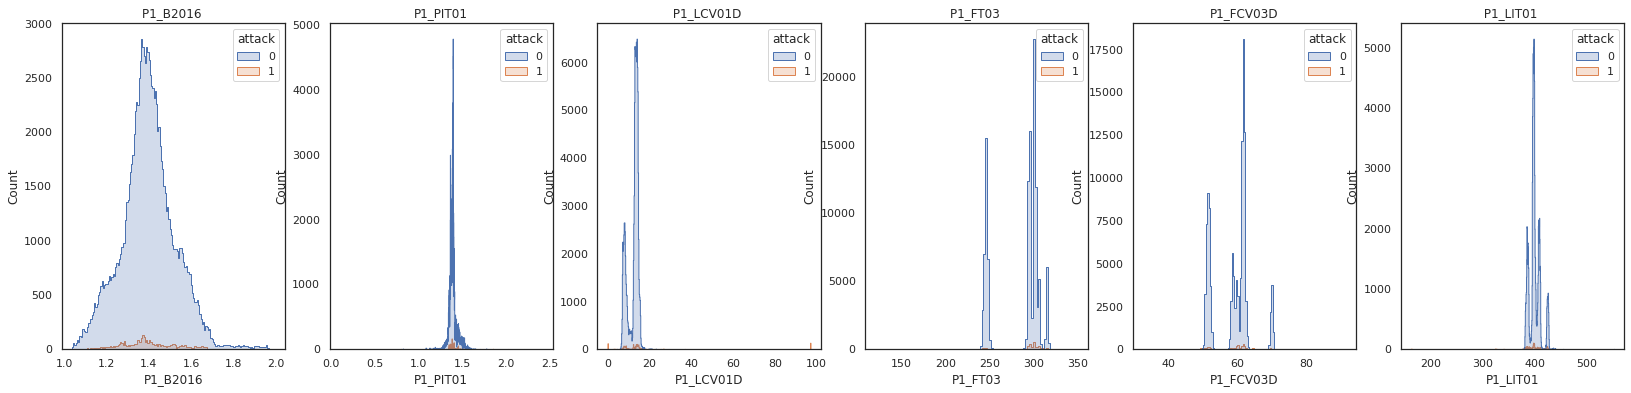

In [23]:
sns.set(style="white")
fig, axs = plt.subplots(1, 6, figsize=(28, 6))
sns.histplot(data=hai_data1, x="P1_B2016", hue="attack", element="step",color="green",fill=True,  ax=axs[ 0] ).set_title("P1_B2016 ")
sns.histplot(data=hai_data1,x="P1_PIT01",hue="attack",  element="step", color="#ff6361",fill=True,ax=axs[ 1]).set_title("P1_PIT01")
sns.histplot(data=hai_data1,x="P1_LCV01D", hue="attack",  element="step",color="#bc5090",ax=axs[2 ] ).set_title(" P1_LCV01D  ")

sns.histplot(data=hai_data1, x="P1_FT03", hue="attack", element="step",color="green",fill=True,  ax=axs[ 3] ).set_title("P1_FT03 ")
sns.histplot(data=hai_data1,x="P1_FCV03D",hue="attack",  element="step", color="#ff6361",fill=True,ax=axs[ 4]).set_title("P1_FCV03D")
sns.histplot(data=hai_data1,x="P1_LIT01", hue="attack",  element="step",color="#bc5090",ax=axs[5 ] ).set_title(" P1_LIT01  ")
plt.show()

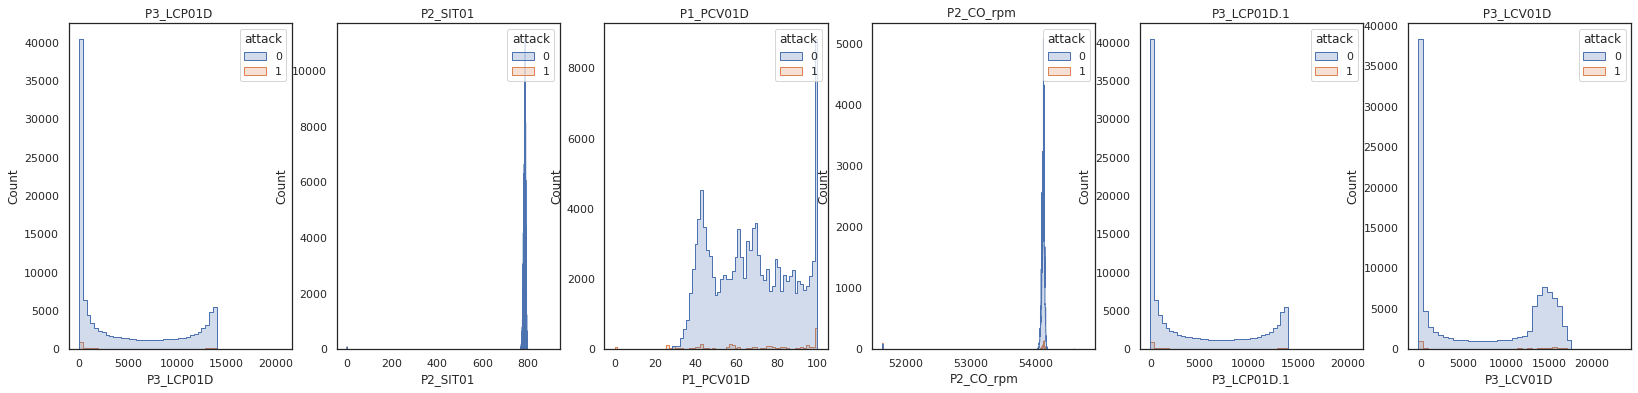

In [24]:
sns.set(style="white")
fig, axs = plt.subplots(1, 6, figsize=(28, 6))
sns.histplot(data=hai_data1, x="P3_LCP01D", hue="attack", element="step",color="green",fill=True,  ax=axs[ 0] ).set_title("P3_LCP01D ")
sns.histplot(data=hai_data1,x="P2_SIT01",hue="attack",  element="step", color="#ff6361",fill=True,ax=axs[ 1]).set_title("P2_SIT01")
sns.histplot(data=hai_data1,x="P1_PCV01D", hue="attack",  element="step",color="#bc5090",ax=axs[2 ] ).set_title(" P1_PCV01D  ")

sns.histplot(data=hai_data1, x="P2_CO_rpm", hue="attack", element="step",color="green",fill=True,  ax=axs[ 3] ).set_title("P2_CO_rpm ")
sns.histplot(data=hai_data1,x="P3_LCP01D.1",hue="attack",  element="step", color="#ff6361",fill=True,ax=axs[ 4]).set_title("P3_LCP01D.1")
sns.histplot(data=hai_data1,x="P3_LCV01D", hue="attack",  element="step",color="#bc5090",ax=axs[5 ] ).set_title(" P3_LCV01D  ")
plt.show()

## <b><span style="color:blue">Step 6: Features Scaling <b></span> 
Data is comprised of attributes with varying scales. Its useful for optimizing your algorithms. We will apply standard scalers on the gaussian features and apply normalization on the non gaussian features.MinMaxScaler preserves the shape of the original distribution.We can apply the MinMaxScaler to the HAI dataset directly to normalize the input variables. It doesn’t meaningfully change the information embedded in the original data and preserves the shape of the original distribution. It subtracts the minimum value in the feature and then divides by the range.

In [25]:
hai_data1.columns

Index(['P1_B2004', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P4_ST_PS', 'P4_HT_PS',
       'P1_B2016', 'P1_PIT01', 'P1_LCV01D', 'P1_FT03', 'P1_FCV03D', 'P1_LIT01',
       'P3_LCP01D', 'P2_SIT01', 'P1_PCV01D', 'P2_CO_rpm', 'P3_LCP01D.1',
       'P3_LCV01D', 'attack'],
      dtype='object')

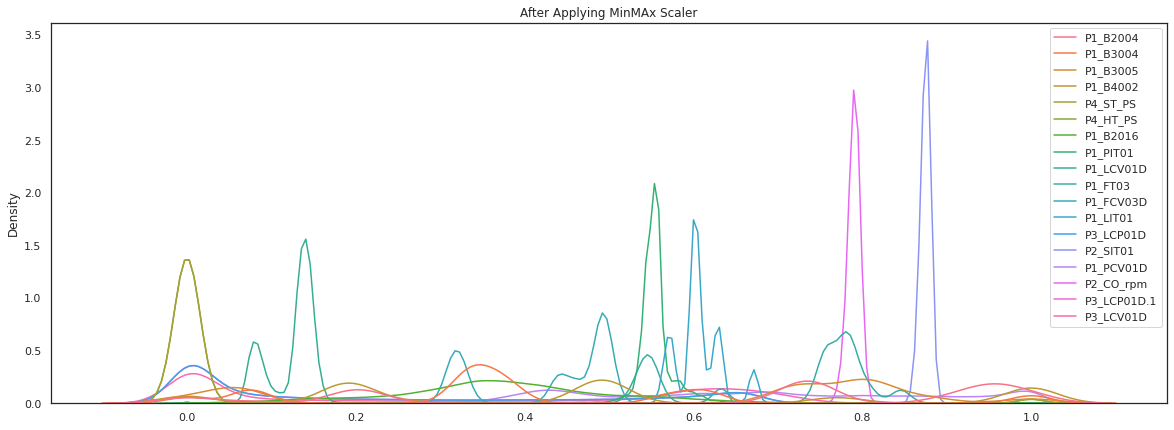

In [26]:
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing 
# retrieve just the numeric input values

array = hai_data1.values
# retrieve just the numeric input values

X_full , y_full = array[:, :-1], array[:,-1]
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X_full)
# convert the array back to a dataframe


scaled = pd.DataFrame(scaled,columns=['P1_B2004', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P4_ST_PS', 'P4_HT_PS',
       'P1_B2016', 'P1_PIT01', 'P1_LCV01D', 'P1_FT03', 'P1_FCV03D', 'P1_LIT01',
       'P3_LCP01D', 'P2_SIT01', 'P1_PCV01D', 'P2_CO_rpm', 'P3_LCP01D.1',
       'P3_LCV01D'])

sns.kdeplot(data=scaled).set_title('After Applying MinMAx Scaler')
plt.show()

## <b><span style="color:blue">Step 7: Balancing the dataset <b></span> 
When there are imbalance class problems, the model is trained mostly on the majority class, which biases the model's prediction towards the majority class.Hence handling of imbalance class is essential before proceeding to the modeling pipeline. One consequence of employing undersampling approaches is that in order to balance the class, we lose a lot of majority class data points. Oversampling strategies compensate for this flaw, however producing several samples within the minority class may lead to model overfitting.

###  <span style="color:blue">Step 7.1: SMOTE + Random Under Sampling</span>
We will combine SMOTE with random undersampling of the majority class.

In [27]:
hai_data1.shape
hai_data1['attack'].value_counts()

0    115352
1      3449
Name: attack, dtype: int64

Counter({0.0: 115352, 1.0: 3449})


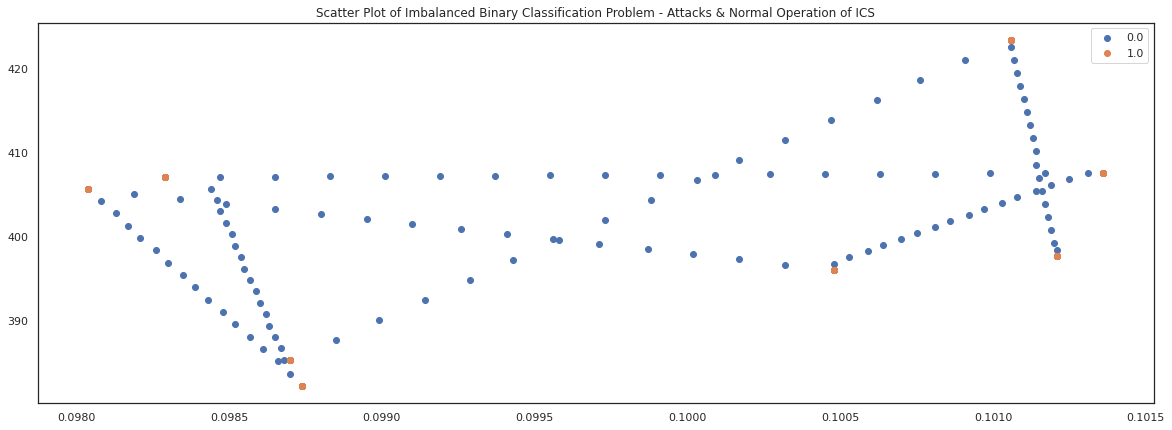

In [28]:
array  = hai_data1.values
X = array[:,:-1]
y = array[:,-1]
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.title('Scatter Plot of Imbalanced Binary Classification Problem - Attacks & Normal Operation of ICS')
plt.legend()
plt.show()

Counter({0.0: 115352, 1.0: 3449})
Counter({0.0: 23070, 1.0: 11535})


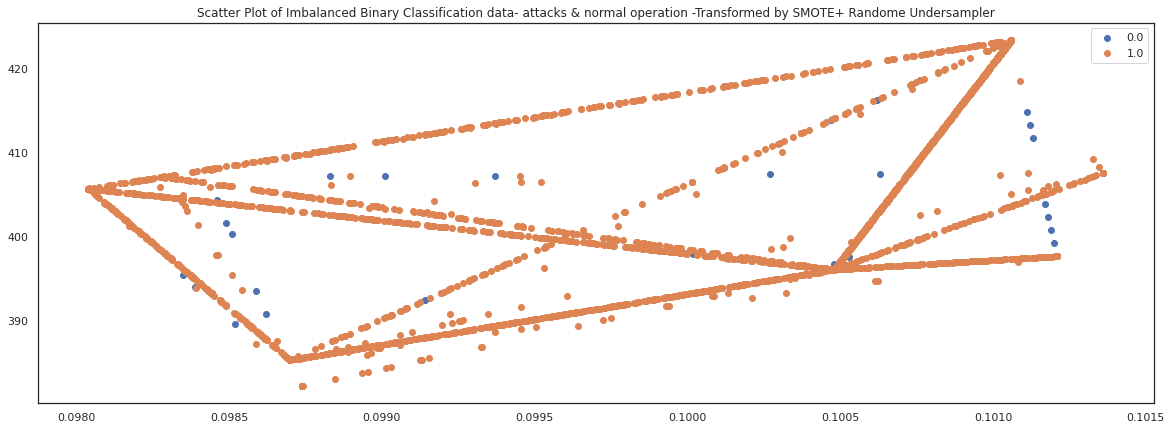

In [29]:
# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset- define pipeline

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

#summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label

# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
plt.title('Scatter Plot of Imbalanced Binary Classification data- attacks & normal operation -Transformed by SMOTE+ Randome Undersampler')
plt.legend()
plt.show()

In [30]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


###  <span style="color:blue">Step 7.2: Features Ranking & Selection</span>
Rank 1D: This a one-dimensional feature ranking employs a ranking algorithm that only considers one feature at a time (e.g. histogram analysis). The Shapiro-Wilk technique is used by default to determine the normality of the distribution of instances with respect to the characteristic. The relative ranks of each characteristic are then plotted on a barplot.

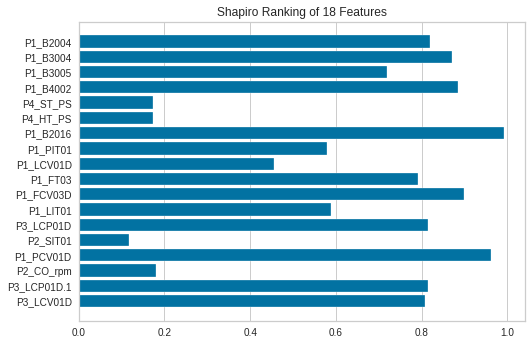

<AxesSubplot:title={'center':'Shapiro Ranking of 18 Features'}>

In [31]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
feature_names1 = [ 'P1_B2004', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P4_ST_PS', 'P4_HT_PS',
       'P1_B2016', 'P1_PIT01', 'P1_LCV01D', 'P1_FT03', 'P1_FCV03D', 'P1_LIT01',
       'P3_LCP01D', 'P2_SIT01', 'P1_PCV01D', 'P2_CO_rpm', 'P3_LCP01D.1',
       'P3_LCV01D']
target_name1 = ['attack']
#XX1 = hai_data1[feature_names1]
#YY1 = hai_data1[target_name1]

visualizer = Rank1D(features=feature_names1,algorithm='shapiro')
visualizer.fit(X, y)           
visualizer.transform(X)        
visualizer.show() 

In [32]:
# convert the array back to a dataframe
hai_data_conv1 = pd.DataFrame(X,columns=['P1_B2004', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P4_ST_PS', 'P4_HT_PS',
       'P1_B2016', 'P1_PIT01', 'P1_LCV01D', 'P1_FT03', 'P1_FCV03D', 'P1_LIT01',
       'P3_LCP01D', 'P2_SIT01', 'P1_PCV01D', 'P2_CO_rpm', 'P3_LCP01D.1',
       'P3_LCV01D'])
hai_data_conv2 = pd.DataFrame(y,columns=['attack'])

hai_data_conv1.head()


,P1_B2004,P1_B3004,P1_B3005,P1_B4002,P4_ST_PS,P4_HT_PS,P1_B2016,P1_PIT01,P1_LCV01D,P1_FT03,P1_FCV03D,P1_LIT01,P3_LCP01D,P2_SIT01,P1_PCV01D,P2_CO_rpm,P3_LCP01D.1,P3_LCV01D
0,0.09870,385.31882,1084.02808,32.0000,0.0,0.0,1.63681,1.38565,12.84080,298.31793,60.89943,391.10596,8.0,785.0,58.78395,54093.0,8.0,16896.0
1,0.09804,405.69220,994.63568,33.1855,0.0,0.0,1.32457,1.48712,7.52010,244.34164,51.43523,408.63907,6616.0,785.0,53.98403,54115.0,6616.0,3312.0
2,0.10048,396.06302,1094.34485,32.6150,0.0,0.0,1.40803,1.39938,12.96760,300.41595,62.21458,396.16650,13800.0,792.0,81.14185,54153.0,13800.0,-272.0
3,0.09870,385.31882,1084.02808,32.0000,0.0,0.0,1.45859,1.40472,12.48747,295.83844,61.58727,387.01657,824.0,784.0,71.31329,54130.0,824.0,14752.0
4,0.09804,405.69220,994.63568,33.1855,0.0,0.0,1.34273,1.54129,7.06761,243.57872,50.84507,406.23657,12616.0,789.0,64.46336,54103.0,12616.0,-112.0


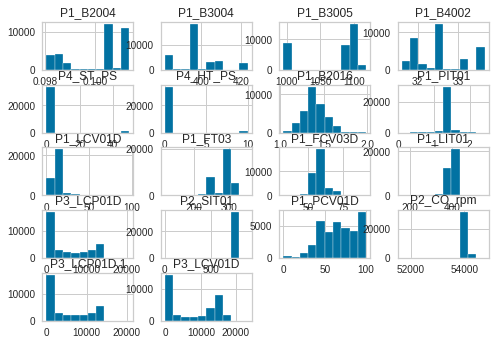

In [33]:
# histograms of the variables
hai_data_conv1.hist()
plt.title('Histogram Plots of MinMax Scaler Transformed Input Variables for the HAI Dataset')
plt.show()

## <b><span style="color:blue">Step 8: Model Building and Prediction/Detection of Attack <b></span> 
As we know that Multivariate time-series data consist of more than one column and a timestamp associated with it. We use algorithms like VAR (Vector Auto-Regression), VMA (Vector Moving Average), VARMA (Vector Auto-Regression Moving Average), VARIMA (Vector Auto-Regressive Integrated Moving Average), and VECM (Vector Error Correction Model). In addition to that we will compare the result to the logistic regression models.

This would involve steps like causality investigation, test for stationary , building of the models and check for  errors.
### 1. Stationary Test

First of all,qe will use Augmented Dickey-Fuller Test (ADF Test) to check the stationary of each variable in the dataset. If the stationarity is not achieved, we need to make the data stationary, such as eliminating the trend and seasonality by differencing and seasonal decomposition.

### 2. ACF and PACF plots 

### 3. Applying Vector Auto Regression (VAR)
In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables. Creating a validation set for time series problems is tricky because we have to take into account the time component. One cannot directly use the train_test_split or k-fold validation since this will disrupt the pattern in the series. The validation set should be created considering the date and time values.

### 4. Comparing Machine Learning Algorithms 

In [34]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the data
X = dr1[:,0:9]
Y = dr1[:,10]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append((' LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append((' CART', DecisionTreeClassifier()))
models.append((' NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: name 'dr1' is not defined

## <b><span style="color:blue">Summary <b></span> 
In this notebook we covered the followings:
* Applying 
    

## <b><span style="color:blue">References <b></span> 
1. Ref 1
2. Ref 2 
    